In [1]:
#Importing required packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer

In [2]:
#Loading dataset into dataframe
df = pd.read_csv('imdb_master.csv',encoding='latin-1')
print(df.head())

#reviews are taken to tokenize
sentences = df['review'].values

#label column for the prediction(has 3 classifiers neg,pos,unsup)
y = df['label'].values

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


## In the code provided, there are three mistake which stop the code to get run successfully; find those mistakes and explain why they need to be corrected to be able to get the code run

In [3]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [4]:
#converting Categorical to Numerical using Label Encoding
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)#applying label encoding on label matrix

#dividing data into train& test(75 & 25)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [5]:
#Shape of the X_train Matrix
X_train.shape[0:]

(75000, 2000)

As the dimension of the X_train is 2000, we are taking 2000 as input layer neurons. The network runs for 75000 times, one for each run.

As the label Matrix has 3classifiers(neg,pos,unsup)we have taken 3neurons for output layer.

We use Softmax as Activation for output layer in Multi-Class Classifier

In [6]:
# Number of features
# print(input_dim)
model = Sequential() #Sequential Neural Network
model.add(layers.Dense(300,input_dim=2000, activation='relu'))#hidden layer with 300neurons, input layer with 2000 Neurons
model.add(layers.Dense(3, activation='softmax'))#Output layer with 3neurons, softmax as activation
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 6s 21ms/step - loss: 0.8808 - acc: 0.5064 - val_loss: 0.8483 - val_acc: 0.5096
Epoch 2/5
293/293 [==============================] - 5s 19ms/step - loss: 0.7922 - acc: 0.5747 - val_loss: 0.8392 - val_acc: 0.5164
Epoch 3/5
293/293 [==============================] - 7s 22ms/step - loss: 0.6905 - acc: 0.6765 - val_loss: 0.8693 - val_acc: 0.5166
Epoch 4/5
293/293 [==============================] - 7s 24ms/step - loss: 0.5042 - acc: 0.8113 - val_loss: 0.9523 - val_acc: 0.5099
Epoch 5/5
293/293 [==============================] - 5s 19ms/step - loss: 0.2974 - acc: 0.9202 - val_loss: 1.0645 - val_acc: 0.5060


In [7]:
#Calculating loss & accuracy
[test_loss, test_acc] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

782/782 [==============================] - 2s 3ms/step - loss: 1.0645 - acc: 0.5060
Evaluation result on Test Data : Loss = 1.0644787549972534, accuracy = 0.5059599876403809


In [8]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


## Plot the loss and accuracy using history object

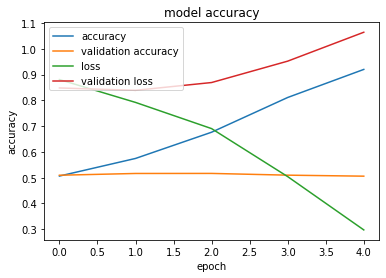

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','validation loss'], loc='upper left')
plt.show()

## Add embedding layer to the model, did you experience any improvement?

In [10]:
pureSentences=df['review']

In [11]:
#Importing package for padding data
from keras.preprocessing.sequence import pad_sequences

max_review_len= max([len(s.split()) for s in pureSentences]) #length of max reviews
vocab_size= len(tokenizer.word_index)+1 #Size of the vocabulary
sentencesPre = tokenizer.texts_to_sequences(pureSentences) #Vector Tokenization on the sentence
padded_docs= pad_sequences(sentencesPre,maxlen=max_review_len) #Padding based on the max length

#converting Categorical to Numerical using Label Encoding
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)#applying label encoding on label matrix

#dividing data into train& test(75 & 25)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

print("vocab_size:",vocab_size)
print("max_review_len:",max_review_len)

vocab_size: 176408
max_review_len: 2470


As the length for maximum of the reviews is 2470, we are taking 2470 as input neurons for input layer and Embedded layer. The network runs for 176408 times, one for each run.

As the label Matrix has 3classifiers(neg,pos,unsup)we have taken 3neurons for output layer.

We use Softmax as Activation for output layer in Multi-Class Classifier

In [12]:
from keras.layers import Embedding, Flatten

model = Sequential()#Sequential Neural Network model
model.add(Embedding(vocab_size, 50, input_length=2470))#Embedding layer with 2470 neurons
model.add(Flatten())#Flattening the Network
model.add(layers.Dense(300, activation='relu',input_dim=2470))#hidden layer with 300neurons, input layer with 2470 Neurons
model.add(layers.Dense(3, activation='softmax'))#Output layer with 3neurons, softmax as activation
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 414s 1s/step - loss: 1.0203 - acc: 0.4913 - val_loss: 0.8665 - val_acc: 0.5004
Epoch 2/5
293/293 [==============================] - 426s 1s/step - loss: 0.8361 - acc: 0.5322 - val_loss: 0.8505 - val_acc: 0.4975
Epoch 3/5
293/293 [==============================] - 377s 1s/step - loss: 0.7586 - acc: 0.6069 - val_loss: 0.8633 - val_acc: 0.4974
Epoch 4/5
293/293 [==============================] - 375s 1s/step - loss: 0.6392 - acc: 0.6998 - val_loss: 0.9511 - val_acc: 0.4858
Epoch 5/5
293/293 [==============================] - 375s 1s/step - loss: 0.4908 - acc: 0.7922 - val_loss: 1.1305 - val_acc: 0.4818


In [13]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [14]:
#Calculating loss & accuracy
[test_loss1, test_acc1] = model.evaluate(X_test,y_test)
print("Evaluation result on Test Data with Embedded layer: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))

782/782 [==============================] - 46s 59ms/step - loss: 1.1305 - acc: 0.4818
Evaluation result on Test Data with Embedded layer: Loss = 1.130493402481079, accuracy = 0.48184001445770264


## Plot the loss and accuracy using history object

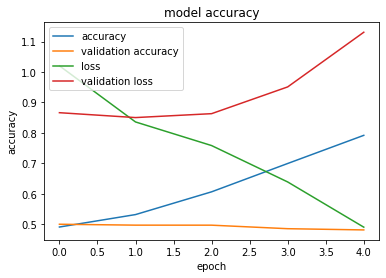

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy','loss','validation loss'], loc='upper left')
plt.show()

## did you experience any improvement?

In [16]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))
print("Evaluation result on Test Data with Embedded layer: Loss = {}, accuracy = {}".format(test_loss1, test_acc1))

Evaluation result on Test Data : Loss = 1.0644787549972534, accuracy = 0.5059599876403809
Evaluation result on Test Data with Embedded layer: Loss = 1.130493402481079, accuracy = 0.48184001445770264


## Predict over one sample of data and check what will be the prediction for that

In [19]:
print("Actual Value:",y_test[7],"Predicted Value",model.predict_classes(X_test[[7],:]))

Actual Value: 1 Predicted Value [1]
